# Week_3_Assignment - Toronto Cluster

All the three questions of this assignment are answered in the same notebook. Question numbers are mentioned before answering the question.

## Question 1

Here I scraped a wikipedia page, to create the notebook from the data on that page.

In [11]:
#import the packages needed for this question
from bs4 import BeautifulSoup
import requests
import pandas as pd


website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(website_url,'html.parser')

my_table = soup.find('tbody')

In [12]:
#collecting all the data in the form of table
table_data = []

for row in my_table.findAll('tr'):
    row_data = []

    for cell in row.findAll('td'):
        row_data.append(cell.text)

    if(len(row_data) > 0):
        data_item = {
            "Postalcode": row_data[0],
            "Borough": row_data[1],
            "Neighbourhood": row_data[2],
        }
        table_data.append(data_item)

In [13]:
# converting table_data into pandas dataframe
df = pd.DataFrame(table_data)
df.head()

,Borough,Neighbourhood,Postalcode
0,Not assigned,Not assigned\n,M1A
1,Not assigned,Not assigned\n,M2A
2,North York,Parkwoods\n,M3A
3,North York,Victoria Village\n,M4A
4,Downtown Toronto,Harbourfront\n,M5A


In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
df['Neighbourhood'] = df['Neighbourhood'].str.replace('\n','')

In [16]:
# removing the cells where Borough is Not assigned

df_filtered = df.loc[df['Borough'] != 'Not assigned']
df_filtered.head()

,Borough,Neighbourhood,Postalcode
2,North York,Parkwoods,M3A
3,North York,Victoria Village,M4A
4,Downtown Toronto,Harbourfront,M5A
5,North York,Lawrence Heights,M6A
6,North York,Lawrence Manor,M6A


#### If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough

In [17]:
df_filtered['Neighbourhood'].loc[df_filtered['Neighbourhood']=='Not assigned'] = df_filtered['Borough'].loc[df_filtered['Neighbourhood']=='Not assigned']

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### More than one neighborhood can exist in one postal code area. Hence using groupby method to group all neighbourhoods in the particular postal code

In [18]:
df_toronto = df_filtered.groupby(['Postalcode','Borough'])['Neighbourhood'].apply(','.join).reset_index()
df_toronto

,Postalcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


In [19]:
df_toronto.shape

(103, 3)

In [20]:
print('The number of rows in my dataframe = ',df_toronto.shape[0])

The number of rows in my dataframe =  103


#### This is end of answer for Question 1

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## Question 2

For me, when I tried to import geocoder python package, I got "ModuleNotFoundError"
Hence, I used geographical coordinates of the neighborhoods using csv file from the server

In [24]:
df_locations = pd.read_csv('https://cocl.us/Geospatial_data')
df_locations.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Combining df_torornto and df_locations dataframes into a new dataframe

In [26]:
df_toronto_loc = pd.merge(left=df_toronto ,right=df_locations, left_on='Postalcode', right_on='Postal Code', how='inner')
df_toronto_loc.head()

,Postalcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476


In [28]:
df_toronto_loc.drop(['Postal Code'],axis=1,inplace=True)

In [29]:
df_toronto_loc

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


In [30]:
df_toronto_loc.shape

(103, 5)

In [32]:
print('The final dataframe now has %d rows and %d columns' %(df_toronto_loc.shape[0], df_toronto_loc.shape[1]))

The final dataframe now has 103 rows and 5 columns


#### This is the end of solution for Question 2

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Question 3

#### Explore and cluster the neighborhoods in Toronto

Using geopy library to get the latitude and longitude values of Toronto City. Using Nominatim to convert an address into latitude and longitude values

In [33]:
from geopy.geocoders import Nominatim

Selecting the Boroughs whos name has Toronto word in it

In [34]:
df_toronto = df_toronto[df_toronto['Borough'].str.contains('Toronto')].reset_index(drop=True)
print(df_toronto.shape)
df_toronto.head()

(39, 3)


,Postalcode,Borough,Neighbourhood
0,M4E,East Toronto,The Beaches
1,M4K,East Toronto,"The Danforth West,Riverdale"
2,M4L,East Toronto,"The Beaches West,India Bazaar"
3,M4M,East Toronto,Studio District
4,M4N,Central Toronto,Lawrence Park


In [35]:
import numpy as np
uniqueBoroughs=np.unique(df_toronto['Borough'])

In [42]:
print("So there are total %d Boroughs, which contain Toronto in their name" %(df_toronto['Borough'].nunique()))

So there are total 4 Boroughs, which contain Toronto in their name


In [38]:
uniqueBoroughs

array(['Central Toronto', 'Downtown Toronto', 'East Toronto',
       'West Toronto'], dtype=object)

In [43]:
df_toronto.tail()

,Postalcode,Borough,Neighbourhood
34,M6P,West Toronto,"High Park,The Junction South"
35,M6R,West Toronto,"Parkdale,Roncesvalles"
36,M6S,West Toronto,"Runnymede,Swansea"
37,M7A,Downtown Toronto,Queen's Park
38,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern


In [44]:
address = 'Toronto, Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of Toronto are 43.653963, -79.387207.


#### Creating Map of Toronto using Folium library

In [45]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

In [46]:
df_toronto_merge = df_toronto_loc[['Postalcode','Borough','Neighbourhood','Latitude','Longitude']]
df_toronto_merge.head()

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [47]:
map_city = folium.Map(location=[latitude, longitude], zoom_start=10)

# Adding markers on the map
for lat, lng, borough, neighborhood in zip(df_toronto_merge['Latitude'], df_toronto_merge['Longitude'], df_toronto_merge['Borough'], df_toronto_merge['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_city)  
    
map_city

#### Again working with only those Boroughs which contain word 'Toronto' in their name

In [48]:
df_toronto_data =  df_toronto_merge[df_toronto_merge['Borough'].str.contains('Toronto')]
df_toronto_data

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
47,M4S,Central Toronto,Davisville,43.704324,-79.388790
48,M4T,Central Toronto,"Moore Park,Summerhill East",43.689574,-79.383160
49,M4V,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",43.686412,-79.400049


#### Using the Foursquare API to explore the neighborhoods

In [49]:
CLIENT_ID = '04CCGGIDEMQYIHJDKAX0HLFUAXENMF45HVQ2MWRWQEGIFDVU' # your Foursquare ID
CLIENT_SECRET = '20FEDXZKERIKFAZDE5NYMIPZRALYUJT5XZY4LNMPT3QEKL0F' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 04CCGGIDEMQYIHJDKAX0HLFUAXENMF45HVQ2MWRWQEGIFDVU
CLIENT_SECRET:20FEDXZKERIKFAZDE5NYMIPZRALYUJT5XZY4LNMPT3QEKL0F


Creating functions to get the category types and the nearby venues which will be used later in this notebook

In [50]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [51]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [52]:
# getting venues in the 500 meters radius
toronto_venues = getNearbyVenues(names=df_toronto_data['Neighbourhood'],
                                   latitudes=df_toronto_data['Latitude'],
                                   longitudes=df_toronto_data['Longitude']
                                  )
toronto_venues

The Beaches
The Danforth West,Riverdale
The Beaches West,India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park,Summerhill East
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront
Ryerson,Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Roselawn
Forest Hill North,Forest Hill West
The Annex,North Midtown,Yorkville
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie
Dovercourt Village,Dufferin
Little Portugal,Trinity
Brockton,Exhibition Place,Parkdale Village
High Park,The Junction South
Parkdale,Roncesvalles
Runnymede

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West,Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
5,"The Danforth West,Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop
6,"The Danforth West,Riverdale",43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop
7,"The Danforth West,Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
8,"The Danforth West,Riverdale",43.679557,-79.352188,Mezes,43.677962,-79.350196,Greek Restaurant
9,"The Danforth West,Riverdale",43.679557,-79.352188,Louis Cifer Brew Works,43.677663,-79.351313,Brewery


In [53]:
print("This resulted in total %d venues" %(toronto_venues.shape[0]))

This resulted in total 1712 venues


In [54]:
# having a look at some of the found venues
toronto_venues.head(15)

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West,Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
5,"The Danforth West,Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop
6,"The Danforth West,Riverdale",43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop
7,"The Danforth West,Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
8,"The Danforth West,Riverdale",43.679557,-79.352188,Mezes,43.677962,-79.350196,Greek Restaurant
9,"The Danforth West,Riverdale",43.679557,-79.352188,Louis Cifer Brew Works,43.677663,-79.351313,Brewery


In [55]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 234 uniques categories.


#### To analyse each neighbourhood, converting 'Venue Category' from categorical to numerical using One Hot Encoding

In [56]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# adding neighborhood column to this dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighbourhood'] 

# moving neighborhood column to make it as first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
toronto_onehot.columns

Index(['Yoga Studio', 'Airport', 'Airport Food Court', 'Airport Gate',
       'Airport Lounge', 'Airport Service', 'Airport Terminal',
       'American Restaurant', 'Antique Shop', 'Aquarium',
       ...
       'Toy / Game Store', 'Trail', 'Train Station',
       'Vegetarian / Vegan Restaurant', 'Video Game Store',
       'Vietnamese Restaurant', 'Wine Bar', 'Wine Shop', 'Wings Joint',
       'Women's Store'],
      dtype='object', length=234)

In [58]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Adelaide,King,Richmond",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.020000,0.000000,...,0.00000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000,0.01
1,Berczy Park,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.00000,0.000000,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,"Brockton,Exhibition Place,Parkdale Village",0.041667,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.000000,0.0625,0.0625,0.0625,0.125,0.1875,0.125,0.000000,0.000000,...,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
5,"Cabbagetown,St. James Town",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,Central Bay Street,0.011905,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.011905,0.000000,...,0.00000,0.000000,0.00,0.011905,0.000000,0.000000,0.011905,0.000000,0.000000,0.00
7,"Chinatown,Grange Park,Kensington Market",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.00000,0.000000,0.00,0.054945,0.000000,0.054945,0.010989,0.000000,0.000000,0.00
8,Christie,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,Church and Wellesley,0.023810,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.011905,0.000000,...,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.011905,0.011905,0.00


#### Building the Top 10 venues into a new dataframe

In [59]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [60]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)


print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(39, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Bar,Steakhouse,Restaurant,Asian Restaurant,Hotel,Sushi Restaurant,Burger Joint,Thai Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Steakhouse,Cheese Shop,Café,Farmers Market,Beer Bar,Bakery,Seafood Restaurant,Greek Restaurant
2,"Brockton,Exhibition Place,Parkdale Village",Café,Breakfast Spot,Coffee Shop,Gym,Grocery Store,Pet Store,Performing Arts Venue,Nightclub,Italian Restaurant,Intersection
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Park,Auto Workshop,Brewery,Smoke Shop,Spa,Burrito Place,Farmers Market,Fast Food Restaurant,Restaurant
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Service,Airport Lounge,Airport Terminal,Boutique,Sculpture Garden,Coffee Shop,Boat or Ferry,Harbor / Marina,Bar,Airport Gate


#### Clustering the Neighbourhoods using kmeans clustering

In [61]:
from sklearn.cluster import KMeans

In [62]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

Finding the optimal number of clusters for clustering the neighbourhoods


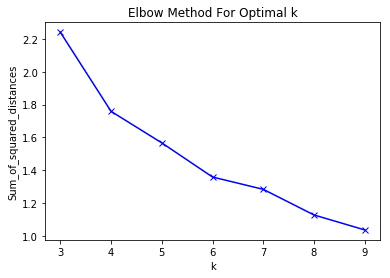

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

Sum_of_squared_distances = []
K = range(3,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In the above graph the elbow is at k=6, hence clustering the neighborhoods in 6 clusters

In [65]:

# set number of clusters
kclusters = 6

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 3, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 5, 0, 0], dtype=int32)

Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [66]:
toronto_merged = df_toronto_data

# adding clustering labels
toronto_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

print(toronto_merged.shape)
toronto_merged.head() 

(39, 16)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Trail,Pub,Health Food Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Women's Store
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store,Bookstore,Restaurant,Dessert Shop,Diner,Pub
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572,0,Park,Sandwich Place,Pizza Place,Sushi Restaurant,Brewery,Burger Joint,Burrito Place,Pub,Pet Store,Gym
43,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,Bakery,Gastropub,Italian Restaurant,American Restaurant,Brewery,Yoga Studio,Latin American Restaurant,Fish Market
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,Park,Bus Line,Swim School,Lawyer,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant


#### Visualising the created clusters

In [67]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [68]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Finally, checking what is there in each cluster

#### Cluster 1

In [69]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,East Toronto,0,Trail,Pub,Health Food Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Women's Store
41,East Toronto,0,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store,Bookstore,Restaurant,Dessert Shop,Diner,Pub
42,East Toronto,0,Park,Sandwich Place,Pizza Place,Sushi Restaurant,Brewery,Burger Joint,Burrito Place,Pub,Pet Store,Gym
43,East Toronto,0,Café,Coffee Shop,Bakery,Gastropub,Italian Restaurant,American Restaurant,Brewery,Yoga Studio,Latin American Restaurant,Fish Market
44,Central Toronto,0,Park,Bus Line,Swim School,Lawyer,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant
45,Central Toronto,0,Gym,Hotel,Clothing Store,Dance Studio,Sandwich Place,Breakfast Spot,Food & Drink Shop,Park,Gastropub,Electronics Store
46,Central Toronto,0,Sporting Goods Shop,Coffee Shop,Yoga Studio,Gym / Fitness Center,Diner,Dessert Shop,Mexican Restaurant,Clothing Store,Chinese Restaurant,Restaurant
47,Central Toronto,0,Pizza Place,Sandwich Place,Dessert Shop,Gym,Italian Restaurant,Coffee Shop,Café,Sushi Restaurant,Diner,Farmers Market
48,Central Toronto,0,Playground,Women's Store,Department Store,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
49,Central Toronto,0,Pub,Coffee Shop,American Restaurant,Sushi Restaurant,Bagel Shop,Restaurant,Sports Bar,Fried Chicken Joint,Pizza Place,Liquor Store


#### Cluster 2

In [70]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Central Toronto,1,Ice Cream Shop,Garden,Women's Store,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


#### Cluster 3

In [71]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
65,Central Toronto,2,Sandwich Place,Café,Coffee Shop,Park,Pizza Place,Burger Joint,Liquor Store,Indian Restaurant,Pub,Middle Eastern Restaurant


#### Cluster 4

In [72]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,Downtown Toronto,3,Coffee Shop,Italian Restaurant,Café,Ice Cream Shop,Japanese Restaurant,Burger Joint,Sandwich Place,Bubble Tea Shop,Gym / Fitness Center,Salad Place
69,Downtown Toronto,3,Coffee Shop,Café,Restaurant,Seafood Restaurant,Beer Bar,Cocktail Bar,Hotel,Japanese Restaurant,Italian Restaurant,Park


#### Cluster 5

In [73]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
70,Downtown Toronto,4,Coffee Shop,Café,Gym,Steakhouse,Restaurant,Hotel,Gastropub,Seafood Restaurant,Bar,Asian Restaurant


#### Cluster 6

In [74]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,Downtown Toronto,5,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Mexican Restaurant,Café,Farmers Market,Brewery,Shoe Store
84,West Toronto,5,Pizza Place,Café,Coffee Shop,Sushi Restaurant,Italian Restaurant,Gym,Bookstore,Bar,Fish & Chips Shop,Indie Movie Theater


From above clustering, the Cluster 1 seems to be more widespread which covers all the boroughs which have word 'Toronto' in their name.

#### This is the end of solution for question 3

## This is the End of the Notebook.
# Thank You for your time.